In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## Detect the shapes in the Given Images assume that the shapes are in the center of the image (your code should detect the shape without color segmentation but can differentiate between the shapes with color segmentation or contour’s 

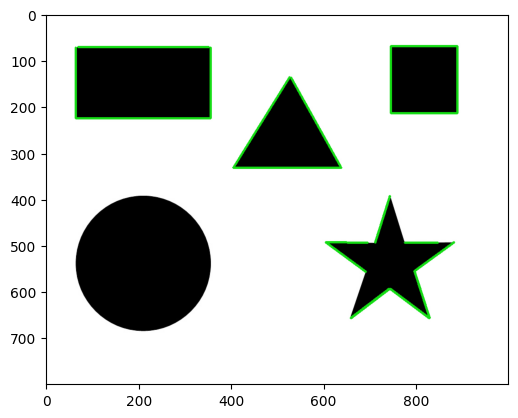

In [12]:
# read the image from arguments
image = cv2.imread('images/someshapes.jpg')

# convert to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# perform edge detection
edges = cv2.Canny(grayscale, 30, 200)

# detect lines in the image using hough lines technique
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 60, np.array([]), 50, 5)
# iterate over the output lines and draw them
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(image, (x1, y1), (x2, y2), color=(20, 220, 20), thickness=3)

# show the image
plt.imshow(image)
plt.show()

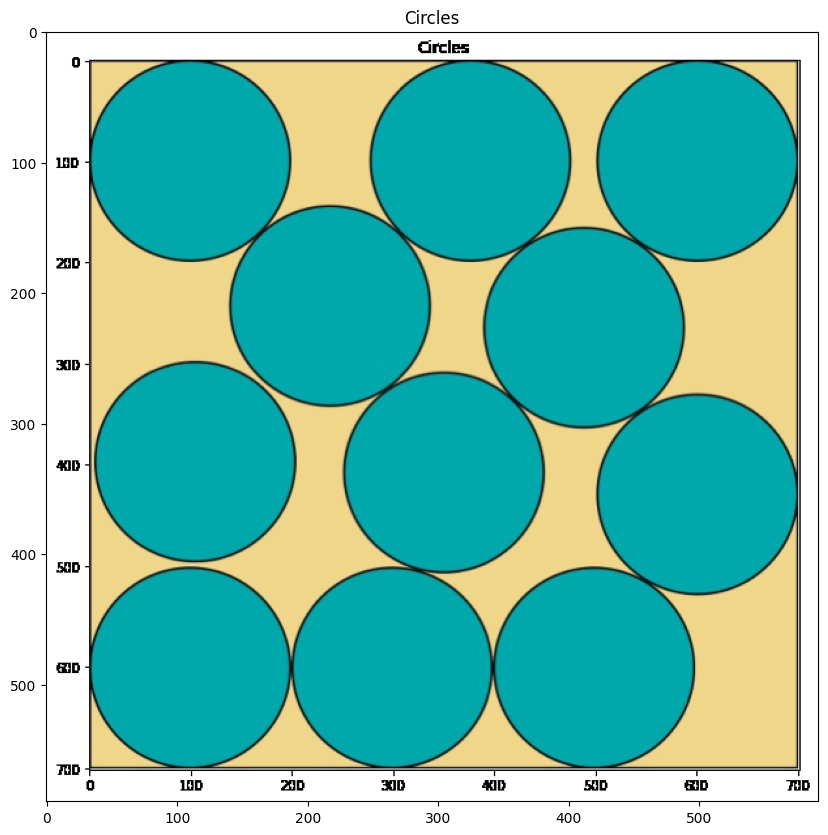

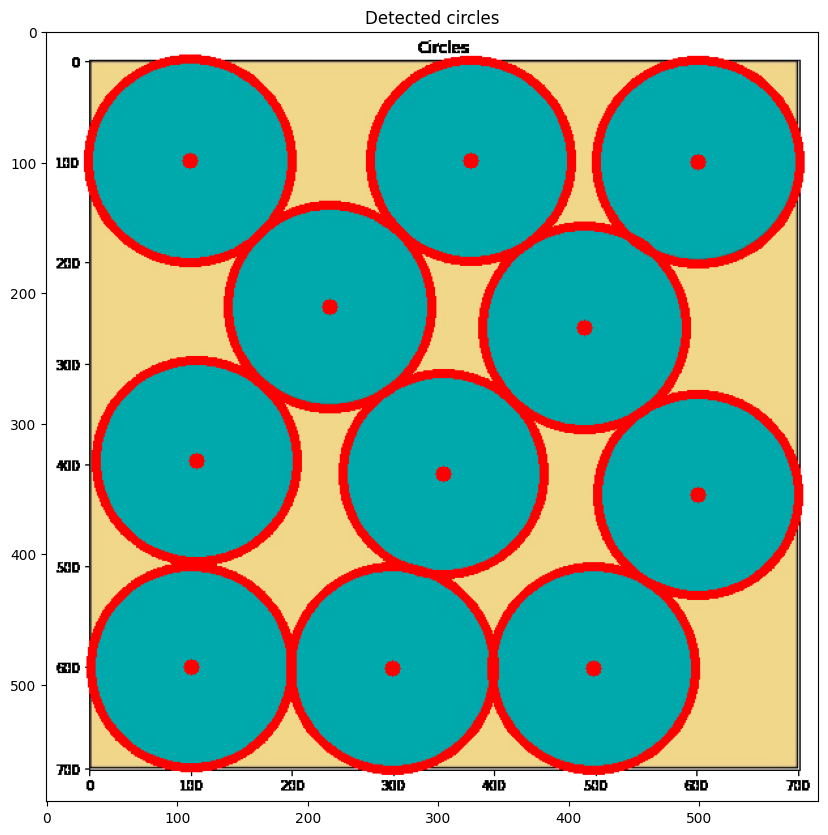

In [11]:
import cv2
image = cv2.imread('images/Circle.png')
imshow('Circles', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 25)

cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (0, 0, 255), 5)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 8)

imshow('Detected circles', image)